In [1]:
# 📦 Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 📂 Load the datasets
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# 🧾 Check basic info
print("Train shape:", train.shape)
print("Test shape:", test.shape)
train.head()


Train shape: (1460, 81)
Test shape: (1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [2]:
# 🔍 Check missing values in training data
missing = train.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)

# 📋 Show missing columns
print("Columns with missing values:\n")
print(missing)

# 🔍 Percentage missing (optional)
missing_percent = (train.isnull().sum() / train.shape[0]) * 100
missing_percent = missing_percent[missing_percent > 0].sort_values(ascending=False)

print("\nMissing value percentage:\n")
print(missing_percent)


Columns with missing values:

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64

Missing value percentage:

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
MasVnrType      59.726027
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
MasVnrArea       0.547945
Electrical       0.068493
dtype: float64


In [3]:
# ❌ Drop columns with too many missing values
train.drop(['PoolQC', 'MiscFeature', 'Alley'], axis=1, inplace=True)

# 🔄 Fill common categorical columns with 'None'
for col in ['Fence', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
            'BsmtExposure', 'BsmtFinType2', 'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'MasVnrType']:
    train[col] = train[col].fillna('None')

# 🔢 Fill numerical columns with 0 or mean
train['MasVnrArea'] = train['MasVnrArea'].fillna(0)
train['GarageYrBlt'] = train['GarageYrBlt'].fillna(train['GarageYrBlt'].median())
train['LotFrontage'] = train['LotFrontage'].fillna(train['LotFrontage'].mean())

# 🔄 Fill Electrical with mode
train['Electrical'] = train['Electrical'].fillna(train['Electrical'].mode()[0])

# ✅ Confirm all missing values fixed
print("Remaining missing values:", train.isnull().sum().sum())


Remaining missing values: 0


In [4]:
# ✅ Check that all missing values are handled
print("Remaining missing values:", train.isnull().sum().sum())


Remaining missing values: 0


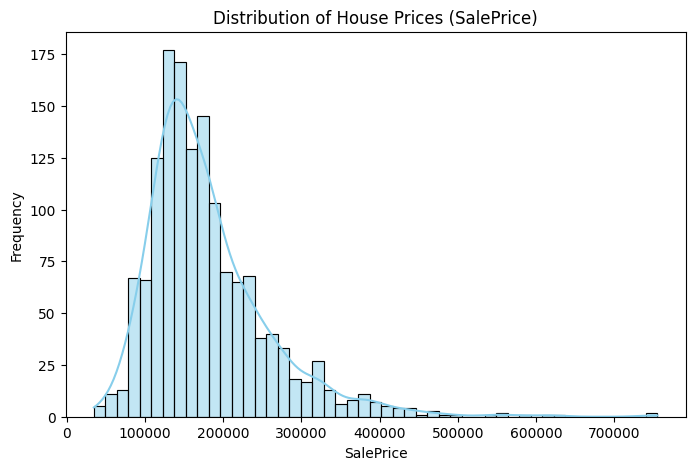

In [5]:
# 📈 Distribution of the target variable
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.histplot(train['SalePrice'], kde=True, color='skyblue')
plt.title("Distribution of House Prices (SalePrice)")
plt.xlabel("SalePrice")
plt.ylabel("Frequency")
plt.show()


In [6]:
# 🔍 Correlation of features with SalePrice
corr = train.corr(numeric_only=True)
top_corr = corr['SalePrice'].sort_values(ascending=False).head(10)
print("Top correlated features:\n", top_corr)


Top correlated features:
 SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64


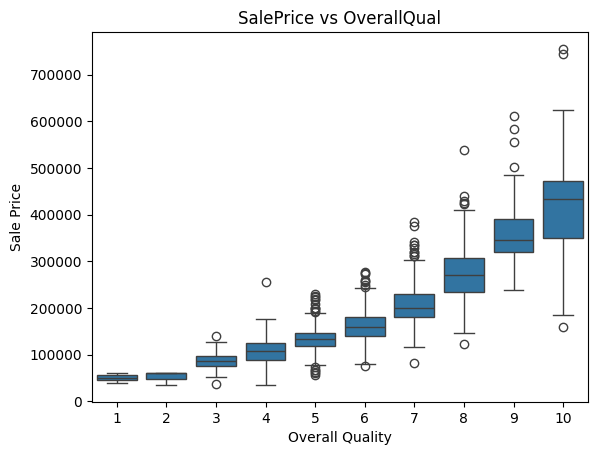

In [7]:
# 📊 SalePrice vs OverallQual
sns.boxplot(x=train['OverallQual'], y=train['SalePrice'])
plt.title("SalePrice vs OverallQual")
plt.xlabel("Overall Quality")
plt.ylabel("Sale Price")
plt.show()


In [8]:
# ✅ Step 1: Convert all text columns to numbers using LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Create encoder
label_enc = LabelEncoder()

# Go through each column that contains text (like 'object' type)
for col in train.select_dtypes(include='object').columns:
    train[col] = train[col].astype(str)                  # Convert to string
    train[col] = label_enc.fit_transform(train[col])     # Convert to numbers

# ✅ Step 2: Split features (X) and target (y)
X = train.drop(['SalePrice', 'Id'], axis=1)   # X = all columns except the target
y = train['SalePrice']                        # y = target column we want to predict

# ✅ Step 3: Split into training and validation sets
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ Confirmation
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)


ModuleNotFoundError: No module named 'sklearn'

In [9]:
!pip install scikit-learn


     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     -------------------- ------------------- 30.7/60.8 kB ? eta -:--:--
     ------------------------- ------------ 41.0/60.8 kB 653.6 kB/s eta 0:00:01
     ------------------------- ------------ 41.0/60.8 kB 653.6 kB/s eta 0:00:01
     -------------------------------------- 60.8/60.8 kB 358.2 kB/s eta 0:00:00
   ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
   ---------------------------------------- 0.1/10.7 MB 1.7 MB/s eta 0:00:07
   ---------------------------------------- 0.1/10.7 MB 1.3 MB/s eta 0:00:09
    --------------------------------------- 0.2/10.7 MB 1.3 MB/s eta 0:00:09
   - -------------------------------------- 0.3/10.7 MB 1.6 MB/s eta 0:00:07
   - -------------------------------------- 0.4/10.7 MB 1.8 MB/s eta 0:00:06
   - -------------------------------------- 0.4/10.7 MB 1.8 MB/s eta 0:00:06
   -- -----


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

label_enc = LabelEncoder()

for col in train.select_dtypes(include='object').columns:
    train[col] = train[col].astype(str)
    train[col] = label_enc.fit_transform(train[col])

X = train.drop(['SalePrice', 'Id'], axis=1)
y = train['SalePrice']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)


X_train shape: (1168, 76)
y_train shape: (1168,)
X_val shape: (292, 76)
y_val shape: (292,)


In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on validation set
y_pred = model.predict(X_val)

# Evaluate the model
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_pred)

print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2 Score):", r2)


Root Mean Squared Error (RMSE): 34051.078673388314
R-squared (R2 Score): 0.8488361606140236


In [12]:
# Display feature importance (coefficients)
import pandas as pd

coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
coeff_df = coeff_df.sort_values(by='Coefficient', ascending=False)
print(coeff_df.head(10))  # Top 10 positive
print(coeff_df.tail(10))  # Top 10 negative


               Coefficient
Street        18736.712502
LandSlope     12436.607032
OverallQual   11681.215196
GarageCars    11253.903377
BsmtFullBath   8807.056630
Fireplaces     5635.320041
Functional     4505.654576
OverallCond    4252.968500
MasVnrType     4075.351305
RoofMatl       3721.820501
               Coefficient
MSZoning      -2181.820390
BldgType      -2270.297918
BedroomAbvGr  -2323.033999
BsmtExposure  -3674.442975
BsmtQual      -4998.115511
ExterQual     -7726.602307
KitchenQual   -9480.917345
Condition2   -10387.920745
KitchenAbvGr -10509.626181
Utilities    -55343.659459


In [13]:
# Apply same label encoding to test set
for col in test.select_dtypes(include='object').columns:
    test[col] = test[col].astype(str)
    test[col] = label_enc.fit_transform(test[col])

# Match features (drop Id)
X_test = test.drop(['Id'], axis=1)

# Predict on test set
test_preds = model.predict(X_test)

# Create submission file
submission = pd.DataFrame({
    'Id': test['Id'],
    'SalePrice': test_preds
})

submission.to_csv('submission.csv', index=False)
print("✅ Submission file saved as 'submission.csv'")


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Alley
- MiscFeature
- PoolQC


In [18]:
# Step 1: Add identifier for train/test
train['is_train'] = True
test['is_train'] = False
test['SalePrice'] = np.nan  # Add target column to test

# Step 2: Combine data
combined = pd.concat([train, test], axis=0, sort=False)

# Step 3: Drop problematic columns
combined.drop(['Alley', 'PoolQC', 'MiscFeature'], axis=1, inplace=True)

# Step 4: Fill missing values
combined.fillna(combined.median(numeric_only=True), inplace=True)

# Step 5: Label Encoding for object columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in combined.select_dtypes(include='object').columns:
    combined[col] = le.fit_transform(combined[col].astype(str))

# Step 6: Split again
train_processed = combined[combined['is_train'] == True]
test_processed = combined[combined['is_train'] == False]

X = train_processed.drop(['Id', 'SalePrice', 'is_train'], axis=1)
y = train_processed['SalePrice']
X_test = test_processed.drop(['Id', 'SalePrice', 'is_train'], axis=1)


In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# Predict and save
test_preds = model.predict(X_test)

submission = pd.DataFrame({
    'Id': test_processed['Id'],
    'SalePrice': test_preds
})
submission.to_csv('submission.csv', index=False)
print("✅ submission.csv created successfully.")


✅ submission.csv created successfully.
